# 6.3 geographic visualizations
### This script will contain
### 00. Import Libraries and data
### 01. Data Wrangling
### 02. Data Consistency checks
### 03. Create a choropleth
### 04. Discuss results
### 00. Import Libraries¶

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import requests
import folium
import json

In [2]:
# This command prompts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 

country_geo = r'C:/Users/asus/Documents/Work/Projects/Career Foundry/Data Analysis Immersion - Achievement 6/us-states.json'

In [5]:
#  In case you want to look at the JSON file contents here too:

url = 'https://coach-courses-us.s3.amazonaws.com/public/courses/data-immersion/A6/6.3/us-states.json'

# Use requests to fetch the JSON data from the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    data = response.json()
    # Now you can work with the JSON data
    print(data)
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}, {'type': 'Feature', '

In [6]:
path = r'/Users/yukbuinnemtat/Desktop/Task 6 Folder'

In [7]:
#Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_selected_clean.csv'), index_col = False)

In [8]:
df.head()

,Unnamed: 0,weekday,start_hour,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride
0,0,Mon,18,W 38 St & 8 Ave,40.754666,-73.991382,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,Female,2013-09-09 18:18:55,2013-09-09 18:35:28
1,1,Thu,18,Lispenard St & Broadway,40.719392,-74.002472,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,Male,2013-09-12 18:38:53,2013-09-12 18:48:34
2,2,Wed,19,9 Ave & W 45 St,40.760193,-73.991255,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,Male,2013-09-18 19:44:04,2013-09-18 19:50:05
3,3,Sat,11,E 33 St & 1 Ave,40.743156,-73.974347,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,Female,2013-09-28 11:54:37,2013-09-28 12:03:58
4,4,Fri,22,Lafayette St & E 8 St,40.730287,-73.990765,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,Female,2013-09-27 22:01:01,2013-09-27 22:08:08


In [9]:
df.shape 

(42993, 15)

In [10]:
df.describe().style.background_gradient(cmap='mako_r', text_color_threshold=0.02)

,Unnamed: 0,start_hour,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,trip_duration,birth_year
count,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000
mean,21496.000000,14.085316,40.734477,-73.990948,40.734070,-73.991242,770.502105,1975.674459
std,12411.154398,4.932889,0.019598,0.012367,0.019603,0.012375,523.444233,10.938735
min,0.000000,0.000000,40.680342,-74.017134,40.680342,-74.017134,60.000000,1924.000000
25%,10748.000000,10.000000,40.721101,-74.000040,40.720828,-74.000271,395.000000,1968.000000
50%,21496.000000,15.000000,40.736245,-73.990765,40.735877,-73.990985,621.000000,1978.000000
75%,32244.000000,18.000000,40.749718,-73.981948,40.749013,-73.982578,999.000000,1984.000000
max,42992.000000,23.000000,40.770513,-73.950048,40.770513,-73.950048,2697.000000,1997.000000


# 2. Data wrangling

In [11]:
df.isnull().sum()

Unnamed: 0                 0
weekday                    0
start_hour                 0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
trip_duration              0
subscriber                 0
birth_year                 0
gender                     0
start_of_ride              0
end_of_ride                0
dtype: int64

In [12]:
# Rename the column
df.rename(columns={'weekday': 'days_of_the_week'}, inplace=True)

In [13]:
# To drop a column named 'column_name'

df = df.drop(columns=['Unnamed: 0'])

In [14]:
df.head()

,days_of_the_week,start_hour,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride
0,Mon,18,W 38 St & 8 Ave,40.754666,-73.991382,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,Female,2013-09-09 18:18:55,2013-09-09 18:35:28
1,Thu,18,Lispenard St & Broadway,40.719392,-74.002472,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,Male,2013-09-12 18:38:53,2013-09-12 18:48:34
2,Wed,19,9 Ave & W 45 St,40.760193,-73.991255,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,Male,2013-09-18 19:44:04,2013-09-18 19:50:05
3,Sat,11,E 33 St & 1 Ave,40.743156,-73.974347,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,Female,2013-09-28 11:54:37,2013-09-28 12:03:58
4,Fri,22,Lafayette St & E 8 St,40.730287,-73.990765,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,Female,2013-09-27 22:01:01,2013-09-27 22:08:08


In [15]:
dups = df.duplicated()

In [17]:
dups.shape # no dups

(42993,)

In [18]:
#Look at column names
df.columns

Index(['days_of_the_week', 'start_hour', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride'],
      dtype='object')

In [19]:
#Create a list of necessary columns
columns = ['start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'subscriber', 'gender']

In [20]:
# Create a subset

state_rec = df[columns]

In [21]:
state_rec.head()

,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,subscriber,gender
0,W 38 St & 8 Ave,40.754666,-73.991382,W 20 St & 7 Ave,40.742388,-73.997262,Subscriber,Female
1,Lispenard St & Broadway,40.719392,-74.002472,St Marks Pl & 2 Ave,40.728419,-73.987140,Subscriber,Male
2,9 Ave & W 45 St,40.760193,-73.991255,W 56 St & 10 Ave,40.768254,-73.988639,Subscriber,Male
3,E 33 St & 1 Ave,40.743156,-73.974347,E 52 St & 2 Ave,40.756014,-73.967416,Subscriber,Female
4,Lafayette St & E 8 St,40.730287,-73.990765,E 7 St & Avenue A,40.726218,-73.983799,Subscriber,Female


In [22]:
state_rec.shape

(42993, 8)

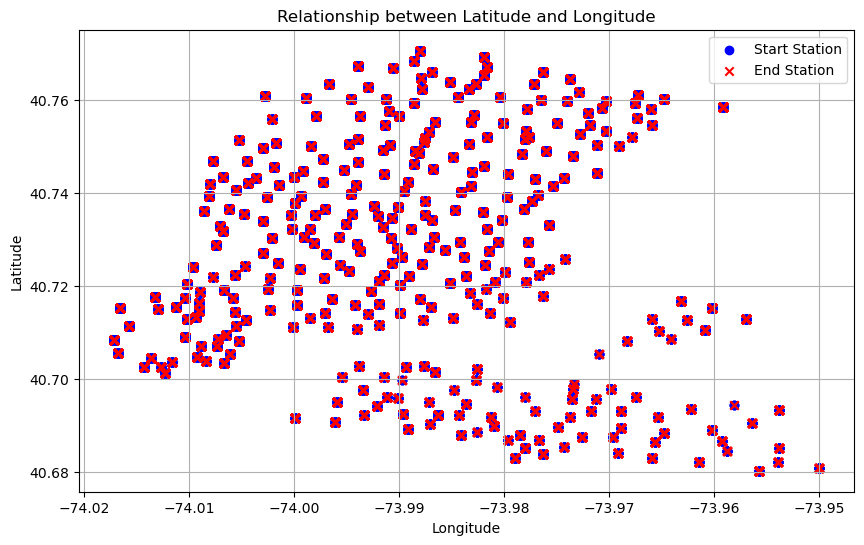

In [26]:
import matplotlib.pyplot as plt  # Make sure to import matplotlib.pyplot

df = pd.DataFrame(state_rec)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['start_station_longitude'], df['start_station_latitude'], marker='o', c='blue', label='Start Station')
plt.scatter(df['end_station_longitude'], df['end_station_latitude'], marker='x', c='red', label='End Station')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Relationship between Latitude and Longitude')
plt.legend()
plt.grid(True)
plt.show()

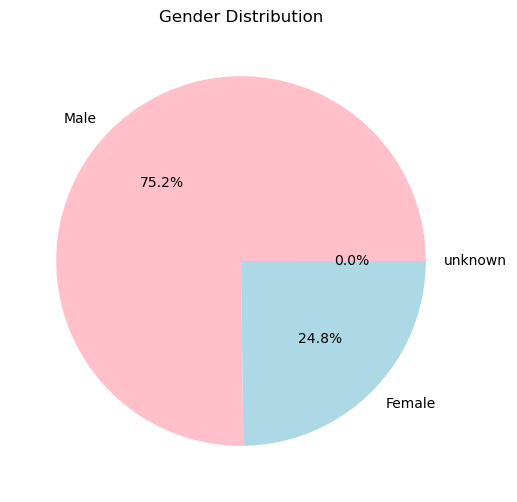

In [27]:
import matplotlib.pyplot as plt

df = pd.DataFrame(state_rec)

# Count the number of occurrences of each category
gender_counts = df['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['pink', 'lightblue'])
plt.title('Gender Distribution')
plt.show()

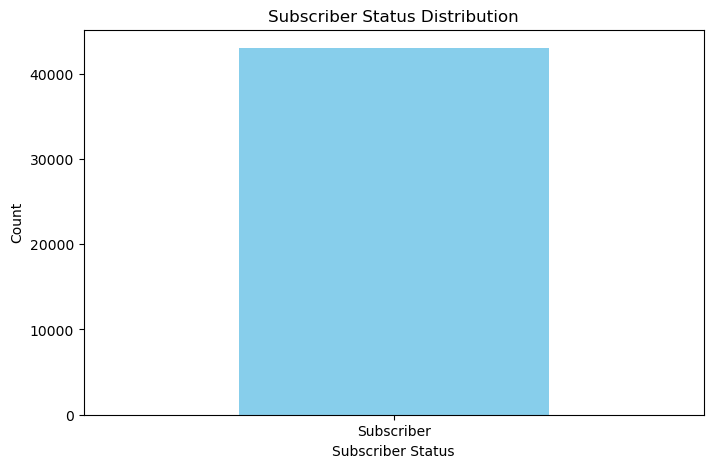

In [28]:
import matplotlib.pyplot as plt

df = pd.DataFrame(state_rec)

# Count the number of occurrences of each category
subscriber_counts = df['subscriber'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 5))
subscriber_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Subscriber Status')
plt.ylabel('Count')
plt.title('Subscriber Status Distribution')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

### Choropleth map is typically used to visualize data associated with geographical regions. My dataset  provided, which includes start and end station names, latitude, longitude, subscriber status, and gender, is not suitable for creating a choropleth map. Choropleth maps are designed to display data over geographic areas like countries, states, or cities.
### So to visualize this data, i considered using other types of charts or plots, depending on gaining more categorical insight.